In [1]:
#Ce qui est en-dessuus est un copié-collé du modèle VGG16 qui peut être utilisé dans la deuxième cellule en chargeant un lien 
#d'une image de champignon.
#Malheureusement, comme on peut le voir sur mon exemple, ce modèle pré-existant ne contient que 5 classes liées 
#aux champignons : 'bolete', 'mushroom', 'agaric', 'hen-of-the-woods', 'stinkhorn'. L'objectif de ces deux premières cellules 
#était surtout de voir le fonctionnement réel de VGG16 et non en vidéo et/ou site internet.

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
from tensorflow.keras.utils import load_img
# load an image from file
image = load_img('shutterstock_274210742_Bolet-roux_Leccinum-versipelle.jpg', target_size=(224, 224))
print(image)

from tensorflow.keras.utils import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)

print(image.shape)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print(image.shape)

from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat, top=1000)
label2 = [label[0][i][1] for i in range(len(label[0]))]
print(label2)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

<PIL.Image.Image image mode=RGB size=224x224 at 0x1D42DB400D0>
(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 378ms/step
['bolete', 'mushroom', 'agaric', 'hen-of-the-woods', 'stinkhorn', 'earthstar', 'gyromitra', 'coral_fungus', 'acorn', 'stone_wall', 'buckeye', 'megalith', 'lumbermill', 'thatch', 'cheeseburger', 'birdhouse', 'jackfruit', 'mongoose', 'robin', 'umbrella', 'slug', 'mailbox', 'mud_turtle', 'plow', 'teddy', 'tile_roof', 'fox_squirrel', 'toaster', 'hatchet', 'hornbill', 'terrapin', 'leopard', 'marmot', 'proboscis_monkey', 'beaver', 'coucal', 'eft', 'bittern', 'patas', 'pomegranate', 'barrow', 'weasel', 'snail', 'nail', 'shovel', 'wood_rabbit', 'French_loaf', 'brain_coral', 'picket_fence', 'drake', 'vizsla', 'squirrel_monkey', 'hare', 'ringlet', 'honeycomb', 'ruffed_grouse', 'hen', 'tricycle', 'partridge', 'box_turtle', 'tractor', 'orange', 'croquet_ball', 'hay', 'red_fox', 'dung_beetle', 'chime', 'lynx', 'porcupine', 'barber_chair', 'red_wolf', 'go

In [3]:
#On va maintenant tenter de faire du transfert learning avec VGG16.

#Pourquoi utiliser VGG16 ? 
#VGG16 n'est pas le plus performant des modèles préexistants. A priori, le plus efficace est l'Efficient Net mais j'ai passé 
#mon weekend entier a essayé de construire un modèle dessus sans y arriver. A l'inverse, VGG16 est mieux documenté sur internet. 
#De plus, c'est ce modèle qui a été utilisé par le groupe de 2A que j'avais contacté et qui avait réalisé leur projet Commande
#Entreprise sur de la reconnaissance d'images. Ils seront ainsi plus à même de nous aider en cas de besoin. De surcroît, 
#ils m'ont déjà donné un lien d'implémentation de SSD300 sur VGG16 ce qui facilitera grandement le travail de cadrage 
#du champignon sur une photo

In [5]:
#Pour créer un modèle, télécharger le dossier Datasets sur le drive (à ne plus modifier car complet). Dès lors, les liens
#écrits dans les lignes de code sont à changer car raccords avec mon dossier Utilisateur Elouan.
#Pour utiliser le modèle, me demander le lien et lancer uniquement les cellules utiles

#Sur ce qui est fait dans ces lignes et reste à faire :
#
#Fait : -Faire le liens entre Dataset et Python
#       -Récupérer les images des datasets en liste d'images
#       -Diviser toutes ces images en trois sets : train, valid et test
#       -Créer directement dans le dossier Datasets trois dossiers Train, Test et Valid contenant ces images rangées par 
#        champignon
#       -Créer un modèle de transfert learning avec VGG16
#       -Entraîner notre modèle de transfert learning
#       -Tester notre modèle
#
#Reste à faire (dans les grandes lignes) : 
#                                          - Améliorer notre modèle (15.22% de précision (pic à 15.57%) pour 300 images et 
#                                            ~ 50 epochs -> me demander le lien .h5 du modèle en cours d'entraînement)
#
#Bilan personnel actuel (au 18/04/23 le soir) : 
#  Le modèle est trop peu précis, l'entraîner sur ne serait-ce qu'une epoch prend un temps monstre et sollicite à 100% mon 
#  processeur. Augmenter le dataset de 50 à 300 images a certes amélioré le modèle mais trop faiblement. Pour tester ensuite
#  le modèle sur de vrais images, le résultat est décevant ; le bon champignon n'étant même pas dans les 5 premiers.
#          

In [5]:
#Les importations

import os
import re
import requests
import shutil
import cv2
import urllib.request
from IPython.display import display
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#Notre liste de classes/catégories de notre modèle. Les 3 premiers éléments de la liste ont un dataset fait manuellement

classes = ['Agaricus bresadolanus', 'Agaricus haemorrhoidarius', 'Amanita verna', 'Tricholoma sulfureum','Amanita phalloides', 
           'Tricholoma equestre', 'Cortinarius orellanus', 'Galerina marginata', 
           'Lepiota brunneoincarnata', 'Paxillus involutus', 'Gyromitra esculenta', 'Russula olivacea', 'Russula heterophylla',
           'Russula virescens', 'Russula cyanoxantha', 'Tricholoma sejunctum', 'Tricholoma saponaceum', 'Amanita junquillea',
           'Tricholoma portentosum', 'Amanita citrina', 'Agaricus silvicola', 'Tricholoma album',
           'Leucoagaricus leucothites', 'Agaricus campestris', 'Tricholoma columbetta', 'Tricholomopsis rutilans', 
           'Kuehneromyces mutabilis', 'Macrolepiota procera', 'Entoloma lividum', 'Calocybe gambosa', 'Entoloma clypeatum',
           'Clitocybe nebularis', 'Lyophyllum decastes', 'Entoloma vernum', 'Omphalotus olearius', 'Lactarius chrysorrheus',
           'Cantharellus cibarius', 'Lactarius sanguifluus', 'Lactarius deliciosus', 'Tricholoma pardinum', 'Tricholoma virgatum',
           'Amanita ovoidea (var. proxima)', 'Tricholoma atrosquamosum', 'Tricholoma terreum', 'Amanita ovoidea', 
           'Macrolepiota rhacodes', 'Morchella rotunda', 'Agaricus silvaticus',
           'Agaricus xanthoderma', 'Sarcosphaera crassa', 'Amanita vaginata', 'Agaricus arvensis',
           'Disciotis venosa', 'Lepista nuda', 'Boletus satanas', 'Suillus luteus', 'Suillus bovinus', 'Boletus erythropus',
           'Suillus grevillei', 'Xerocomus chrysenteron', 'Clitocybe phyllophila', 'Inocybe asterospora', 'Pleurotus eryngii',
           'Clitopilus prunulus', 'Marasmius oreades', 'Pleurotus cornucopiae', 'Amanita muscaria', 'Amanita pantherina',
           'Amanita spissa', 'Amanita caesarea', 'Amanita rubescens', 'Pleurotus ostreatus', 'Coprinus atramentarius',
           'Ramaria formosa', 'Gymnopilus spectabilis', 'Coprinus comatus', 'Ramaria botrytis', 'Pholiota squarrosa', 
           'Leccinum aurantiacum', 'Tylopilus felleus', 'Gyroporus castaneus', 'Leccinum scabrum', 'Boletus edulis',
           'Xerocomus badius', 'Russula mustelina', 'Russula emetica', 'Russula nigricans', 'Russula drimeia', 'Russula lepida',
           'Russula ochroleuca', 'Lactarius vellereus', 'Lactarius torminosus', 'Lactarius pubescens', 'Lactarius piperatus',
           'Lactarius volemus', 'Lactarius scrobiculatus', 'Tricholoma ustaloides', 'Hypholoma fasciculare', 
           'Hypholoma lateritium', 'Tricholoma populinum', 'Armillaria mellea', 'Agrocybe aegerita']
print(len(classes))

102


In [7]:
#Ces fonctions ont pour but de rendre une liste de liens filtrés selon que le dataset du champignon en question a été fait
#manuellement ou non.

def images_multimedia(champignon):
    #Cas où le dataset est un txt récupéré de gbif
    #Chemin vers le dossier contenant le fichier texte
    chemin_dossier = r'C:\Users\Elouan\Datasets\{}'.format(champignon)
    #Nom du fichier texte à récupérer
    nom_fichier = "multimedia.txt"
    #Chemin complet vers le fichier texte
    chemin_complet = os.path.join(chemin_dossier, nom_fichier)
    #On récupère tout le contenu du txt
    with open(chemin_complet, "r", encoding="utf8") as f:
        contenu = f.read()
    #On met le contenu sous forme de liste en enlevant les espaces   
    contenu = ' '.join(contenu.split())
    contenu = contenu.split(" ")
    liens = []
    #On récupère tous les liens des images du dataset
    for i in range(len(contenu)):
        if contenu[i] == 'image/jpeg' : 
            liens.append(contenu[i+1])
            
    # Expression pour trouver les liens jpg, jpeg et JPG
    jpg_regex = re.compile(r'\.(jpg|jpeg|JPG)$')
    #Premier filtre pour ne garder que les liens jpg, jpeg et JPG plus certains de fonctionner sans bug
    liens = list(filter(jpg_regex.search, liens))
    #Second filtre pour enlever les liens trop grands qui mènent à l'échec de la création du modèle
    liens = list(filter(lambda x: len(x) < 150, liens))
    #Troisième filtre pour enlever des types de liens rares qui ne s'ouvrent pas mais passent les tests d'ouverture
    liens = list(filter(lambda lien: not lien.lower().endswith(('att.jpg', 'att.JPG')), liens))
    
    return liens

def images_directes(champignon):
    #Cas où le dataset a été fait manuellement
    #Chemin vers le dossier contenant le fichier texte
    chemin_dossier = r'C:\Users\Elouan\Datasets\{}'.format(champignon)
    #Nom du fichier texte à récupérer
    nom_fichier = "{}.txt".format(champignon)
    #Chemin complet vers le fichier texte
    chemin_complet = os.path.join(chemin_dossier, nom_fichier)
    #On récupère tout le contenu du txt
    with open(chemin_complet, "r", encoding="utf8") as f:
        contenu = f.read()
    #On met le contenu sous forme de liste    
    contenu = ' '.join(contenu.split())
    liens = contenu.split(" ")
    
    # Expression pour trouver les liens jpg, jpeg et JPG
    jpg_regex = re.compile(r'\.(jpg|jpeg|JPG)$')
    #Premier filtre pour ne garder que les liens jpg, jpeg et JPG plus certains de fonctionner sans bug
    liens = list(filter(jpg_regex.search, liens))
    #Second filtre pour enlever les liens trop grands qui mènent à l'échec de la création du modèle
    liens = list(filter(lambda x: len(x) < 150, liens))
    #Troisième filtre pour enlever des types de liens rares qui ne s'ouvrent pas mais passent les tests d'ouverture
    liens = list(filter(lambda lien: not lien.lower().endswith(('att.jpg', 'att.JPG')), liens))
    
    return liens

images_multimedia("Agaricus silvicola")[:300]
#images_directes("Tricholoma sulfureum")


['https://www.artportalen.se/MediaLibrary/2013/12/efee08be-4901-4046-8324-ff2e985c0f85_image.jpg',
 'https://www.artportalen.se/MediaLibrary/2013/12/1b80f66e-d682-4bda-b9dd-2f1a2f314d5f_image.jpg',
 'https://www.artportalen.se/MediaLibrary/2013/12/03dfa64c-b199-4236-9100-a536d4eccf45_image.jpg',
 'https://www.artportalen.se/MediaLibrary/2014/10/8a731b6a-0569-4dff-876f-e6c86560b0f9_image.jpg',
 'https://www.artportalen.se/MediaLibrary/2014/10/da6c2e46-fdf5-4271-b180-9a11775fbc89_image.jpg',
 'https://www.artportalen.se/MediaLibrary/plants/2008/large/96960.jpg',
 'http://media.canadensys.net/cmmf/2507.jpg',
 'http://media.canadensys.net/cmmf/1192.jpg',
 'http://media.canadensys.net/cmmf/1122.jpg',
 'https://www.artportalen.se/MediaLibrary/2023/2/c4399c90-1022-40e6-b5b4-dd78fe78af7f_image.jpg',
 'https://www.artportalen.se/MediaLibrary/2023/2/6ab73bee-d3c7-4161-b355-48a6fb2ee23b_image.jpg',
 'https://www.artportalen.se/MediaLibrary/2023/2/6e8448d4-1da6-4d71-9240-0ab0964566ea_image.jpg',
 

In [8]:
#On cherche à diviser tous les images du dataset en trois sous listes : train (70%), test (15%) et valid (15%)

def division_datasets(liens) : 
    #On va au début limiter le nombre de photos de chaque dataset à traiter. On pourra ainsi remplacer 300 par 100,
    #200, 500... len(liens). Mais on évitera len(liens) car le temps de calcul risque d'être astronomique.
    
    #Dans le cas où le nombre de liens disponibles est supérieur à 300, on va limiter à 300 : 
    if len(liens) > 300 : 
        nbr_train = int(300*0.7)
        nbr_test = int(300*0.15)
        nbr_valid = int(300*0.15)
        list_train = []
        list_test = []
        list_valid = []
    
        for i in range(nbr_train) : 
            list_train.append(liens[i])
        for i in range(nbr_train, nbr_train + nbr_test) : 
            list_test.append(liens[i])
        for i in range(nbr_train + nbr_test, 300) : 
            list_valid.append(liens[i])    
    
    #Dans le cas où le nombre de liens disponibles est d’ores et déjà inférieur à 300, on garde tous les liens possibles : 
    else:
        list_train = []
        list_test = []
        list_valid = []
    
        for i in range(0,len(liens)-4,5) : 
            list_train.append(liens[i]) 
            list_train.append(liens[i+1])
            list_train.append(liens[i+2])
            list_test.append(liens[i+3]) 
            list_valid.append(liens[i+4]) 
            
    return list_train, list_test, list_valid  

#division_datasets(images_multimedia("Amanita junquillea"))

In [9]:
#Pour faciliter la suite, on réunit tout dans un dictionnaire où chaque clé est un champignon 
#avec pour valeur une liste : [list_train, list_test, list_valid]

dico_liens = {}
#Première sous-liste avec les champignons dont le dataset est fait manuellement, on s'arrête ainsi au 3ème champignon
liste_classe1 = classes[:3]
#On remplit le dictionnaire avec ces premières classes/catégories
for classe in liste_classe1 :
    liens = images_directes(classe)
    list_train, list_test, list_valid = division_datasets(liens)
    dico_liens[classe] = [list_train, list_test, list_valid]

#Seconde sous-liste avec les champignons dont le dataset est issu de gbif, on prend tous les autres champignons
liste_classe2 = classes[3:]
#On remplit le dictionnaire avec ces nouvelles classes/catégories
for classe in liste_classe2 :
    liens = images_multimedia(classe)
    list_train, list_test, list_valid = division_datasets(liens)
    dico_liens[classe] = [list_train, list_test, list_valid]


print(len(dico_liens['Agaricus bresadolanus'][0]))
print(len(dico_liens['Agaricus bresadolanus'][2]))
print((dico_liens['Agaricus silvicola'][1][10:20]))
print(len(dico_liens['Amanita muscaria'][0]))
print(len(dico_liens['Amanita muscaria'][2]))

27
9
['https://svampe.databasen.org/uploads/2022-10298449_HJluynEzo.JPG', 'https://mycoportal.org/neb/mycology/NEB00066/NEB00066854_lg.jpg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/232697121/original.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/232697094/original.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/232697157/original.jpeg', 'https://inaturalist-open-data.s3.amazonaws.com/photos/231231558/original.jpeg', 'https://mycoportal.org/vpi/mycology/VPI-F-0000/VPI-F-0000042-01_lg.jpg', 'https://mycoportal.org/vpi/mycology/VPI-F-0000/VPI-F-0000041-01_lg.jpg', 'https://mycoportal.org/vpi/mycology/VPI-F-0000/VPI-F-0000040-01_lg.jpg', 'https://svampe.databasen.org/uploads/2022-10294743_By7guTTbi.JPG']
210
45


In [22]:
#IMPORTANT : Cette cellule n'est à exécuter qu'une seule fois. C'est elle seule qui crée directement dans notre répertoire de 
#nouveaux dossiers volumineux. Cette cellule est donc très lente à s'exécuter (2H38min sur mon ordinateur pour 50 images 
#par dataset et 16H pour 300 images par dataset). Mais une fois faite, plus besoin de la relancer sauf si on change le 
#nombre d'images à traiter.

#On va essayer de créer un modèle VGG16. Pour cela, on a besoin de trois dossiers contenant respectivement toutes 
#les train, test et valid data de chaque classe/catégorie.

total_train = 0
total_test = 0
total_valid = 0

nom_dossier_parent = "Datasets"

#On crée trois dossier enfants Train, Test et Valid dans le dossier parent Datasets
nom_dossier_enfant1 = "Train"
nom_dossier_enfant2 = "Test"
nom_dossier_enfant3 = "Valid"
chemin_dossier_enfant1 = os.path.join(nom_dossier_parent, nom_dossier_enfant1)
chemin_dossier_enfant2 = os.path.join(nom_dossier_parent, nom_dossier_enfant2)
chemin_dossier_enfant3 = os.path.join(nom_dossier_parent, nom_dossier_enfant3)
os.mkdir(chemin_dossier_enfant1)
os.mkdir(chemin_dossier_enfant2)
os.mkdir(chemin_dossier_enfant3)

#On va créer dans chacun de ces dossiers enfants des sous-dossiers contenant respectivement les train, test et valid de chaque
#champignon
for i in range(len(classes)) :
    champignon = classes[i]
    sous_dossier0 = "train_{}".format(champignon)
    sous_dossier1 = "test_{}".format(champignon)
    sous_dossier2 = "valid_{}".format(champignon)
    os.mkdir(os.path.join("Datasets\Train", sous_dossier0))
    os.mkdir(os.path.join("Datasets\Test", sous_dossier1))
    os.mkdir(os.path.join("Datasets\Valid", sous_dossier2))
    
    j = 0
    k = '0'
    #On va maintenant ajouter à chacun de ses sous_dossiers les images des champignons correspondants
    for lien_photo in dico_liens[classes[i]][j]:
        var_train = False
        
        #Quatrième filtre pour ne pas considérer les images non traitables par PIL.
        try:
            with urllib.request.urlopen(link) as url:
                # Vérifie si le fichier est une image valide
                if url.info().get_content_type().startswith('image'):
                    var_train = True
        except:
            pass
        
        #Cinquième filtre pour ne pas considérer les images dont les liens ne sont pas accessibles.
        try:
            response = requests.head(lien_photo)
            if response.status_code == 200 and var_train == True:
                #Si le lien est accessible, alors on l'ajoute au sous_dossier
                nom_fichier = k + lien_photo.split('/')[-1]
                chemin_fichier = os.path.join("Datasets\Train\{}".format(sous_dossier0), nom_fichier)
                with open(chemin_fichier, 'wb') as f:
                    reponse = requests.get(lien_photo)
                    f.write(reponse.content)
                k = str(int(k)+1)
                total_train += 1
                
        except requests.exceptions.RequestException:
            pass

    k = '0'    
    
    for lien_photo in dico_liens[classes[i]][j+1]:
        var_test = False
        
        #Quatrième filtre pour ne pas considérer les images non traitables par PIL.
        try:
            with urllib.request.urlopen(link) as url:
                # Vérifie si le fichier est une image valide
                if url.info().get_content_type().startswith('image'):
                    var_test = True
        except:
            pass
        
        #Cinquième filtre pour ne pas considérer les images dont les liens ne sont pas accessibles.
        try:
            response = requests.head(lien_photo)
            if response.status_code == 200 and var_test == True:
                #Si le lien est accessible, alors on l'ajoute au sous_dossier
                nom_fichier = k + lien_photo.split('/')[-1]
                chemin_fichier = os.path.join("Datasets\Test\{}".format(sous_dossier1), nom_fichier)
                with open(chemin_fichier, 'wb') as f:
                    reponse = requests.get(lien_photo)
                    f.write(reponse.content)
                k = str(int(k)+1)  
                total_test += 1
        except requests.exceptions.RequestException:
            pass   

    k = '0'    
    
    for lien_photo in dico_liens[classes[i]][j+2]:
        var_valid = False
        
        #Quatrième filtre pour ne pas considérer les images non traitables par PIL.
        try:
            with urllib.request.urlopen(link) as url:
                # Vérifie si le fichier est une image valide
                if url.info().get_content_type().startswith('image'):
                    var_valid = True
        except:
            pass
        
        #Cinquième filtre pour ne pas considérer les images dont les liens ne sont pas accessibles.
        try:
            response = requests.head(lien_photo)
            if response.status_code == 200 and var_valid == True:
                #Si le lien est accessible, alors on l'ajoute au sous_dossier
                nom_fichier = k + lien_photo.split('/')[-1] 
                chemin_fichier = os.path.join("Datasets\Valid\{}".format(sous_dossier2), nom_fichier)
                with open(chemin_fichier, 'wb') as f:
                    reponse = requests.get(lien_photo)
                    f.write(reponse.content)
                k = str(int(k)+1)
                total_valid += 1
                
        except requests.exceptions.RequestException:
            pass

In [9]:
#On doit redimensionner les images car on utilise VGG16 qui n'accepte que des dimensions précises
IMG_SHAPE  = 224
batch_size = 32

In [10]:
#On doit relever le nombre total d'images en train, test et valid pour créer le modèle.

total_train = 19303
total_test = 4276
total_valid = 4229

print("Total Training Images",total_train)
print("--")
print("Total Testing Images",total_test)
print("--")
print("Total Validation Images",total_valid)

Total Training Images 19303
--
Total Testing Images 4276
--
Total Validation Images 4229


In [11]:
#On explicite les arborescences utiles pour la suite

train_dir = r'C:\Users\Elouan\Datasets\Train'
test_dir = r'C:\Users\Elouan\Datasets\Test'
valid_dir = r'C:\Users\Elouan\Datasets\Valid'

In [12]:
#On redimensionne et on mélange nos images

image_gen_train = ImageDataGenerator(rescale = 1./255)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size, directory = train_dir, shuffle= True, 
                                                     target_size = (IMG_SHAPE,IMG_SHAPE), class_mode = 'binary')
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size, directory=test_dir,target_size=(IMG_SHAPE, IMG_SHAPE),
                                                   class_mode='binary')
image_generator_validation = ImageDataGenerator(rescale=1./255)
val_data_gen = image_generator_validation.flow_from_directory(batch_size=batch_size, directory=valid_dir,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='binary')


Found 19303 images belonging to 102 classes.
Found 4276 images belonging to 102 classes.
Found 4229 images belonging to 102 classes.


In [13]:
#On construit notre modèle de transfert learning avec VGG16

#On appelle VGG16 entraîné sur imagenet mais sans qu'on doit le réentraîné dessus
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

#On gèle l'entraînement des layers de VGG16 car c'est déjà fait
for layer in pre_trained_model.layers:
    layer.trainable = False

#On va néanmoins modifier le dernier layer pour nos classes
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
#On est dans le cas d'une Multi-Class Classification avec 102 classes, on utilise donc l'activation Softmax. Si on décide que
#sur une photo, on puisse repérer des champignons différents. Il faudra passer en Multi-Label Classification.
x = tf.keras.layers.Dense(102, activation='softmax')(x)

#On peut maintenant relier le modèle initial de VGG16 avec ce qu'on a modifié
model = tf.keras.Model(pre_trained_model.input, x)
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# On charge le modèle que l'on a sauvegardé pour reprendre l'entraînement là où on l'a laissé

new_model = tf.keras.models.load_model('model.h5')

In [15]:
#On entraîne notre modèle. Plus le nombre d'epochs est grand meilleur le modèle sera au fur et à mesure. Prêtez néanmoins 
#attention à l'overfitting.

new_model.fit(train_data_gen, steps_per_epoch=(total_train//batch_size), epochs = 1, validation_data=val_data_gen,
                          validation_steps=(total_valid//batch_size), batch_size = batch_size, verbose = 1)

603/603 [==============================] - 1201s 2s/step - loss: 3.5233 - acc: 0.1441 - val_loss: 3.8554 - val_acc: 0.1494


134/134 [==============================] - 214s 2s/step - loss: 3.6793 - acc: 0.1522
test_loss, test accuracy [3.6792845726013184, 0.15224508941173553]
--


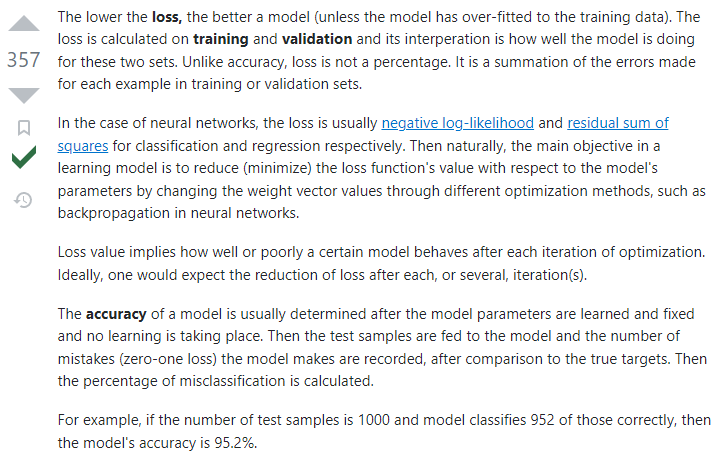

In [16]:
#On teste notre modèle sur nos images de tests

result = new_model.evaluate(test_data_gen,batch_size=batch_size)
print("test_loss, test accuracy",result)
print("--")
img = Image.open("Loss et accuracy.png")
display(img)

In [17]:
#On va sauvegarder notre modèle pour pouvoir continuer l'entraînement plus tard

new_model.save('model.h5')

In [20]:
import numpy as np
from tensorflow.keras.utils import load_img
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import img_to_array

# On charge une image depuis notre dossier utilisateur
image = load_img('images.jpeg', target_size=(224, 224))

image = img_to_array(image)

# Redimensionne l'image 
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

image = preprocess_input(image)

# On peut tester notre modèle sur une image que l'on choisit puis on fait des prédictions sur chacune de nos classes
prediction = new_model.predict(image)
print(prediction[0])
print('\n')
print('Classes prédites :')

# Associer chaque nom de classe à sa prédiction de probabilité
dico_probs = dict(zip(classes, prediction[0]))

# Trier les prédictions par probabilité décroissante
probs_tri = sorted(dico_probs.items(), key=lambda x: x[1], reverse=True)

# Afficher les cinq plus probables prédictions
for i in range(5):
    print(f"{probs_tri[i][0]}: {probs_tri[i][1]:.14f}")
print('\n')
print('Vrai champignon = Pleurotus eryngii :', "{:.14f}".format(prediction[0][classes.index('Pleurotus eryngii')]))

1/1 [==============================] - 0s 72ms/step
[7.2997170e-21 0.0000000e+00 5.7884637e-30 0.0000000e+00 0.0000000e+00
 4.2952267e-22 2.9939258e-05 6.9140123e-18 0.0000000e+00 0.0000000e+00
 9.9996936e-01 1.4370896e-25 1.9936296e-37 0.0000000e+00 7.2811771e-11
 6.3778862e-07 1.7059390e-13 2.0784290e-09 2.1566586e-34 0.0000000e+00
 7.7258696e-23 1.9820773e-10 0.0000000e+00 1.2650033e-19 9.0501222e-14
 5.3691089e-19 1.7190374e-20 1.7238722e-33 5.2261929e-14 2.9397468e-22
 0.0000000e+00 0.0000000e+00 1.0261573e-16 0.0000000e+00 2.1332531e-38
 0.0000000e+00 2.9684444e-25 0.0000000e+00 0.0000000e+00 5.8437772e-14
 8.4639175e-27 0.0000000e+00 0.0000000e+00 1.6048675e-08 0.0000000e+00
 0.0000000e+00 1.0414791e-22 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.9804759e-18 1.6130706e-34 0.0000000e+00 8.7837731e-35
 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.1803308e-11 0.0000000e+00
 2.7772272e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e